Nama : Agung Marbun Submission 1 Proyek Pertama : Membuat Model NLP dengan TensorFlow.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import tensorflow as tf
nltk.download('punkt')

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Kebetulan untuk datanya saya download melalui kaggle agar lebih mudah dibanding meng-ekstrak file. Link downloadnya disini : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews ( Search : IMDB Dataset of 50K Movie Reviews)

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


Karena data mencapai 50000 saya hanya ingin menggunakan 5000 sample acak

In [ ]:
df_subset = df.sample(n=5000, random_state=42)

In [ ]:
df_subset

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative
...,...,...
39885,One of eastwood's best movies after he had sep...,positive
17566,My blurred childhood memories have kept the ec...,negative
16062,I love Zombie-Movies and I love amateur-produc...,negative
48445,Chan is in New York and he gets involved with ...,positive


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 33553 to 20382
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [ ]:
df_subset.sentiment.value_counts()

positive    2519
negative    2481
Name: sentiment, dtype: int64

In [ ]:
text = df_subset['review'][33553]
print(text)
print('<===============>')
print(word_tokenize(text))

I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the

In [ ]:
corpus = []
for text in df_subset['review']:
  words = [word.lower() for word in word_tokenize(text)]
  corpus.append(words)

In [ ]:
num_words = len(corpus)
print(num_words)

5000


In [ ]:
df_subset.shape

(5000, 2)

Disini saya tidak menggunakan metode sebagai berikut
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

In [ ]:
train_size = int(df_subset.shape[0] * 0.8)

review_latih = df_subset.review[:train_size]
review_test = df_subset.review[train_size:]

label_latih = df_subset.sentiment[:train_size]
label_test = df_subset.sentiment[train_size:]

In [ ]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(review_latih)
review_latih = tokenizer.texts_to_sequences(review_latih)
review_latih = pad_sequences(review_latih, maxlen=128, truncating='post', padding='post')

In [ ]:
review_latih[0], len(review_latih[0])

(array([  11,   64,  438,   10,  646,    5,    1,  164,    4,    1,    1,
           3,   41,    1,  164,  418,   13,  218,    5,   70,   15,   47,
         274, 3933,   10,  100,   25,   74,   28,    4,    1,  115,  126,
          39,    1,  152,   25,    8,    1,  314, 1415,  434,  140,   15,
          42,   54,    9,   13,  714,    5,   25,    2,  621, 1557,  127,
        1876,    2,  595,  127,   18,  144, 1200,  204,   25, 1181,    9,
          13,    2,  403,  314, 1415,   41,   37,  165, 1145,    6,    8,
           6,  403,   78, 4545,   20,    1, 2848,   68, 1876, 4317, 1076,
        1876, 1736, 1876,   10,   13,    1, 1415,  120,  766,   23,  185,
         679,    4,    2,  644, 3127, 1876,  307,  258,  359,  625,   80,
         322,   20,   92,  322,   20, 1817,    3,  472,   16,    1,    3,
          13,  196,   53,  218,   92, 2227, 4795], dtype=int32),
 128)

In [ ]:
review_test = tokenizer.texts_to_sequences(review_test)
review_test = pad_sequences(review_test, maxlen=128, truncating='post', padding='post')

In [ ]:
review_test[0], len(review_test[0])

(array([   9,   45,   74, 3495,  158,  229,   42,  226,  495,   11,   59,
          25, 3199,   31,  140,   47, 4371,   59,   25,    2,  384,  270,
         290,    4,   10,  364,   31,  140,   38,   29,  235,    5,  906,
         748,    1,  226,  794,   11,  176,  131,    1,  920,  934,   38,
        1338, 2060,  690,   10,   52, 4767,  154,   67,   69,  200,   43,
        1798,    3,   57,  123, 2780,    1,  722,   13,  738,  821,  515,
          15,   42,   54,    3,  334,   50, 1051,    5,    1,  723,  117,
         928,  722,    4,  568,    9,    1, 1033, 3569, 2912,    8, 2326,
          10,  192,   25,   42, 4111,   97,   11,   59, 1287, 2981,   20,
           2,  261,    4,   39, 1243,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0], dtype=int32),
 128)

In [ ]:
le = LabelEncoder()
label_latih = le.fit_transform(label_latih)
label_test = le.transform(label_latih)

In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.Embedding(input_dim=5000, output_dim=100, input_length=128, trainable=True),
            tf.keras.layers.LSTM(100, dropout=0.1, return_sequences=True),
            tf.keras.layers.LSTM(100, dropout=0.1),
            tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# berhubung hanya ingin membandingkan 2 value(nilai) ada baiknya menggunakan binary_crossentropy

In [ ]:
from keras.layers import BatchNormalization

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=100, input_length=128, trainable=True),
    tf.keras.layers.LSTM(50, dropout=0.2, kernel_regularizer=tf.keras.regularizers.l2(0.01), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, dropout=0.2, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.add(BatchNormalization())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 64)           320000    
                                                                 
 lstm_8 (LSTM)               (None, 128, 50)           23000     
                                                                 
 dropout_2 (Dropout)         (None, 128, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
 batch_normalization_2 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nAkurasi telah mencapai > 90%!")
callbacks = myCallback()

In [ ]:
history = model.fit(review_latih, label_latih, epochs=20,
                    batch_size=64, validation_data=(review_latih, label_latih),
                    callbacks=[callbacks])

Epoch 1/20
63/63 [==============================] - 22s 272ms/step - loss: 4.2355 - accuracy: 0.5297 - val_loss: 1.6229 - val_accuracy: 0.4930
Epoch 2/20
63/63 [==============================] - 24s 388ms/step - loss: 3.0254 - accuracy: 0.6975 - val_loss: 1.8186 - val_accuracy: 0.6435
Epoch 3/20
63/63 [==============================] - 19s 310ms/step - loss: 2.5680 - accuracy: 0.7330 - val_loss: 2.4889 - val_accuracy: 0.7975
Epoch 4/20
63/63 [==============================] - 16s 254ms/step - loss: 2.6632 - accuracy: 0.7628 - val_loss: 3.0028 - val_accuracy: 0.4933
Epoch 5/20
63/63 [==============================] - 16s 261ms/step - loss: 2.5629 - accuracy: 0.7145 - val_loss: 2.5160 - val_accuracy: 0.6365
Epoch 6/20
63/63 [==============================] - 16s 251ms/step - loss: 2.2670 - accuracy: 0.7860 - val_loss: 1.6137 - val_accuracy: 0.5970
Epoch 7/20
63/63 [==============================] - 16s 254ms/step - loss: 1.7573 - accuracy: 0.8363 - val_loss: 2.4574 - val_accuracy: 0.7628

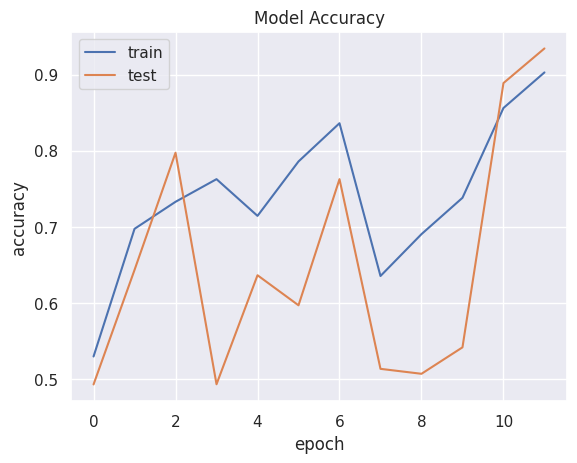

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

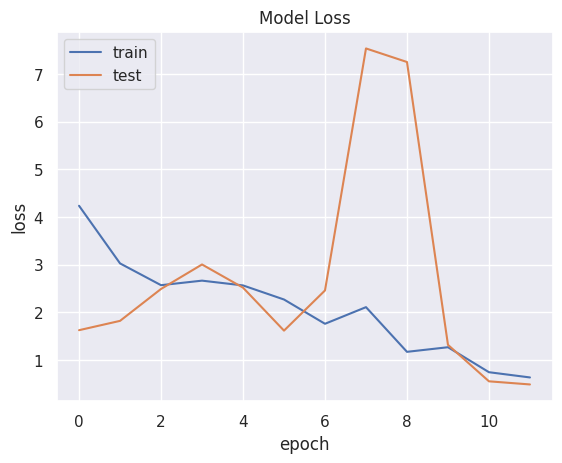

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()